In [1]:
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import Dataset, DataLoader

from dataset import BlobsDataset


from PIL import Image
import io

from utils import display_video
from IPython.display import clear_output

from models.modules import FC_vec
from models.sm import ScoreBasedModelsV2
import copy

device = 'cuda:0'

In [2]:
ds = BlobsDataset(
    n_samples_per_cluster=250,
    n_clusters=4,
    radius=5,
    cluster_std=0.6,
)
data_loader = DataLoader(dataset=ds, batch_size=64, shuffle=True)


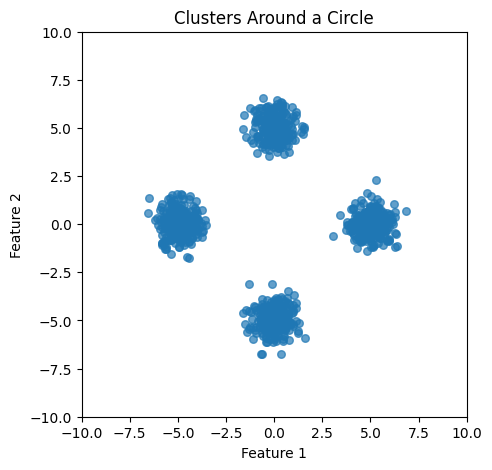

In [3]:
# Visualize the blobs
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ds.add_blobs(ax)
ax.set_title("Clusters Around a Circle")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

In [4]:
score = None
models = [
    ScoreBasedModelsV2(score,
        mode={'type': 've',
            'sigma_min': 0.01,
            'sigma_max': 1,
            'schedule': 'linear'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 've',
            'sigma_min': 0.01,
            'sigma_max': 3,
            'T': 0.01,
            'schedule': 'sigmoid'}).to(device),
]

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\21448\AppData\Local\Temp\ipykernel_31148\400434483.py:14: SyntaxWarning: invalid escape sequence '\s'
  axs[nm,  0].text(-18.0, 6, f"$\sigma_t$: {model.mode["schedule"]}", ha='center', va='center', fontsize=40)
C:\Users\21448\AppData\Local\Temp\ipykernel_31148\400434483.py:15: SyntaxWarning: invalid escape sequence '\s'
  axs[nm,  0].text(-18.0, 3, f"$\sigma_{{min}}$: {model.mode["sigma_min"]}", ha='center', va='center', fontsize=40)
C:\Users\21448\AppData\Local\Temp\ipykernel_31148\400434483.py:16: SyntaxWarning: invalid escape sequence '\s'
  axs[nm,  0].text(-18.0, 0, f"$\sigma_{{max}}$: {model.mode["sigma_max"]}", ha='center', va='center', fontsize=40)


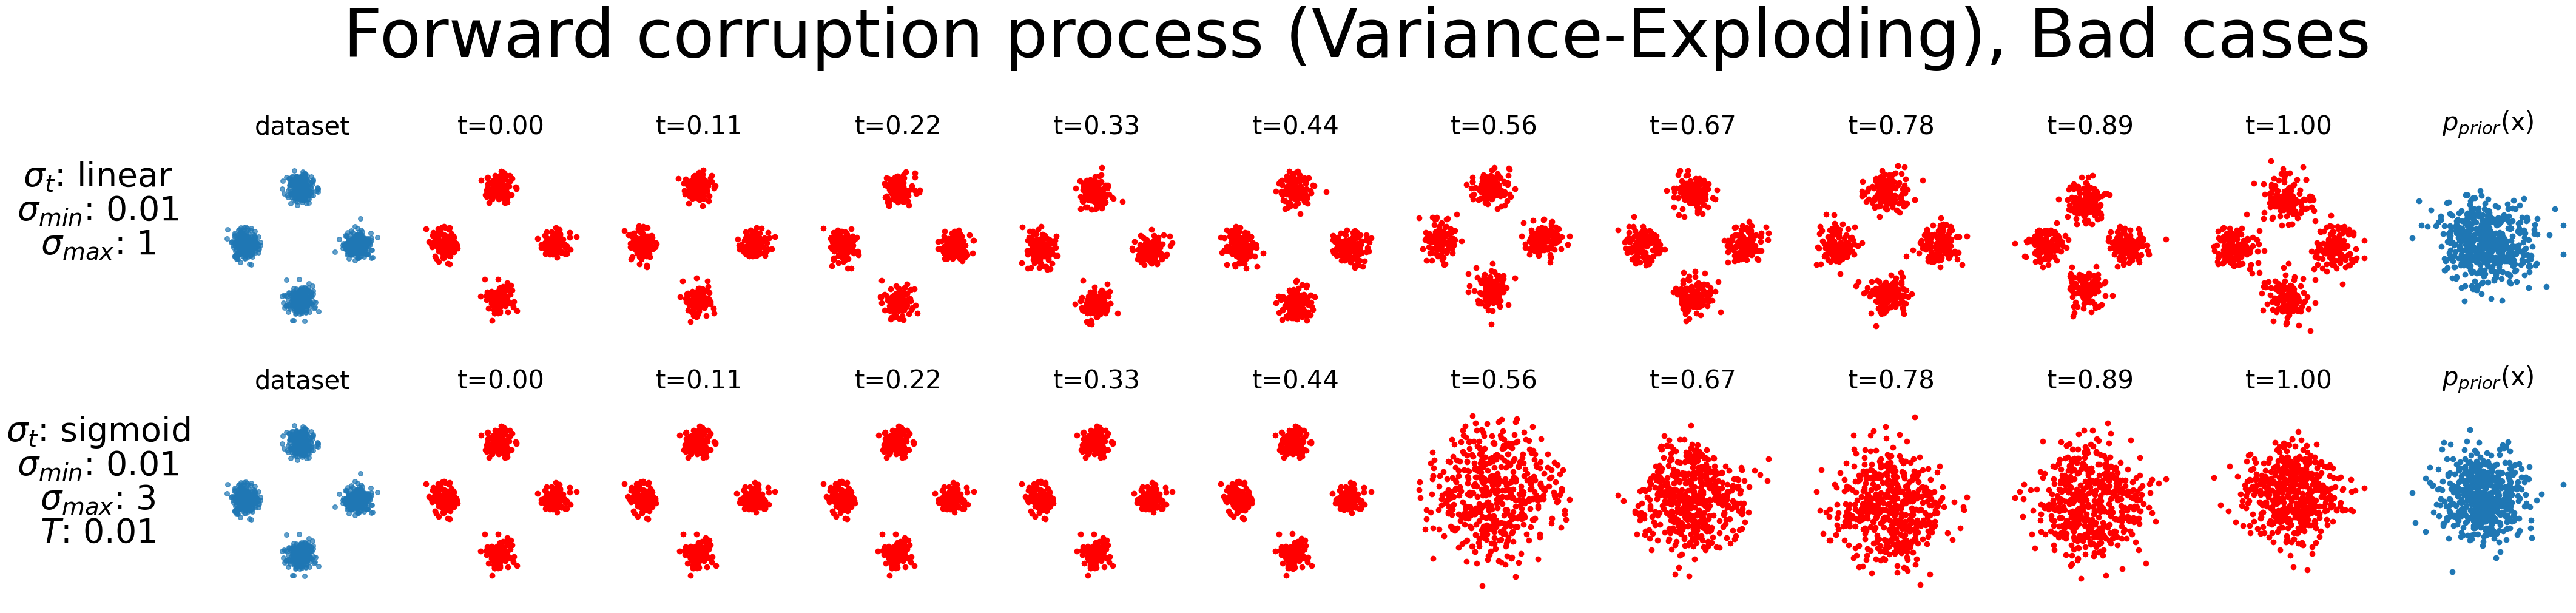

<Figure size 640x480 with 0 Axes>

In [5]:
# Visualize the blobs
x0 = ds.X[:500].to(device)

n_time = 10 
fig, axs = plt.subplots(len(models), n_time + 2, figsize=(5*n_time, len(models)*5))

for nm, model in enumerate(models):
    ds.add_blobs(axs[nm, 0])
    axs[nm,  0].axis('off')
    axs[nm, 0].set_xlim(-10, 10)
    axs[nm,  0].set_ylim(-10, 10)
    axs[nm,  0].set_title(f'dataset', fontsize=30)
    axs[nm,  0].axis('equal')
    axs[nm,  0].text(-18.0, 6, f"$\sigma_t$: {model.mode["schedule"]}", ha='center', va='center', fontsize=40)
    axs[nm,  0].text(-18.0, 3, f"$\sigma_{{min}}$: {model.mode["sigma_min"]}", ha='center', va='center', fontsize=40)
    axs[nm,  0].text(-18.0, 0, f"$\sigma_{{max}}$: {model.mode["sigma_max"]}", ha='center', va='center', fontsize=40)
    if model.mode["schedule"] == 'sigmoid':
        axs[nm,  0].text(-18.0, -3, f"$T$: {model.mode["T"]}", ha='center', va='center', fontsize=40)
        
    for i, t in enumerate(torch.linspace(0, 1, n_time)):
        x = model.corruption_process(x0, t).detach().cpu()
        axs[nm, i+1].scatter(x[:, 0], x[:, 1], color='red', label='*')
        axs[nm, i+1].set_xlim(-10, 10)
        axs[nm, i+1].set_ylim(-10, 10)
        axs[nm, i+1].axis('equal')
        axs[nm, i+1].axis('off')
        axs[nm, i+1].set_title(f't={t:.2f}', fontsize=30)
    axs[nm, -1].set_title(f'$p_{{prior}}$(x)', fontsize=30)
    axs[nm, -1].set_xlim(-10, 10)
    axs[nm, -1].set_ylim(-10, 10)
    axs[nm, -1].axis('equal')
    axs[nm, -1].axis('off')
    randn_samples = torch.randn(500, 2)
    axs[nm, -1].scatter(
        randn_samples[:, 0], 
        randn_samples[:, 1], color='tab:blue', label='*')
        
plt.suptitle(f'Forward corruption process (Variance-Exploding), Bad cases', fontsize=80, y=1.1)
plt.show()
plt.tight_layout()

In [12]:
score = None
models = [
    ScoreBasedModelsV2(score,
        mode={'type': 've',
            'sigma_min': 0.01,
            'sigma_max': 3,
            'schedule': 'linear'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 've',
            'sigma_min': 0.01,
            'sigma_max': 3,
            'schedule': 'quadratic'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 've',
            'sigma_min': 0.01,
            'sigma_max': 3,
            'schedule': 'cosine'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 've',
            'sigma_min': 0.01,
            'sigma_max': 3,
            'T': 0.1,
            'schedule': 'sigmoid'}).to(device),
]

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\21448\AppData\Local\Temp\ipykernel_31148\564505582.py:14: SyntaxWarning: invalid escape sequence '\s'
  axs[nm,  0].text(-18.0, 6, f"$\sigma_t$: {model.mode["schedule"]}", ha='center', va='center', fontsize=40)
C:\Users\21448\AppData\Local\Temp\ipykernel_31148\564505582.py:15: SyntaxWarning: invalid escape sequence '\s'
  axs[nm,  0].text(-18.0, 3, f"$\sigma_{{min}}$: {model.mode["sigma_min"]}", ha='center', va='center', fontsize=40)
C:\Users\21448\AppData\Local\Temp\ipykernel_31148\564505582.py:16: SyntaxWarning: invalid escape sequence '\s'
  axs[nm,  0].text(-18.0, 0, f"$\sigma_{{max}}$: {model.mode["sigma_max"]}", ha='center', va='center', fontsize=40)


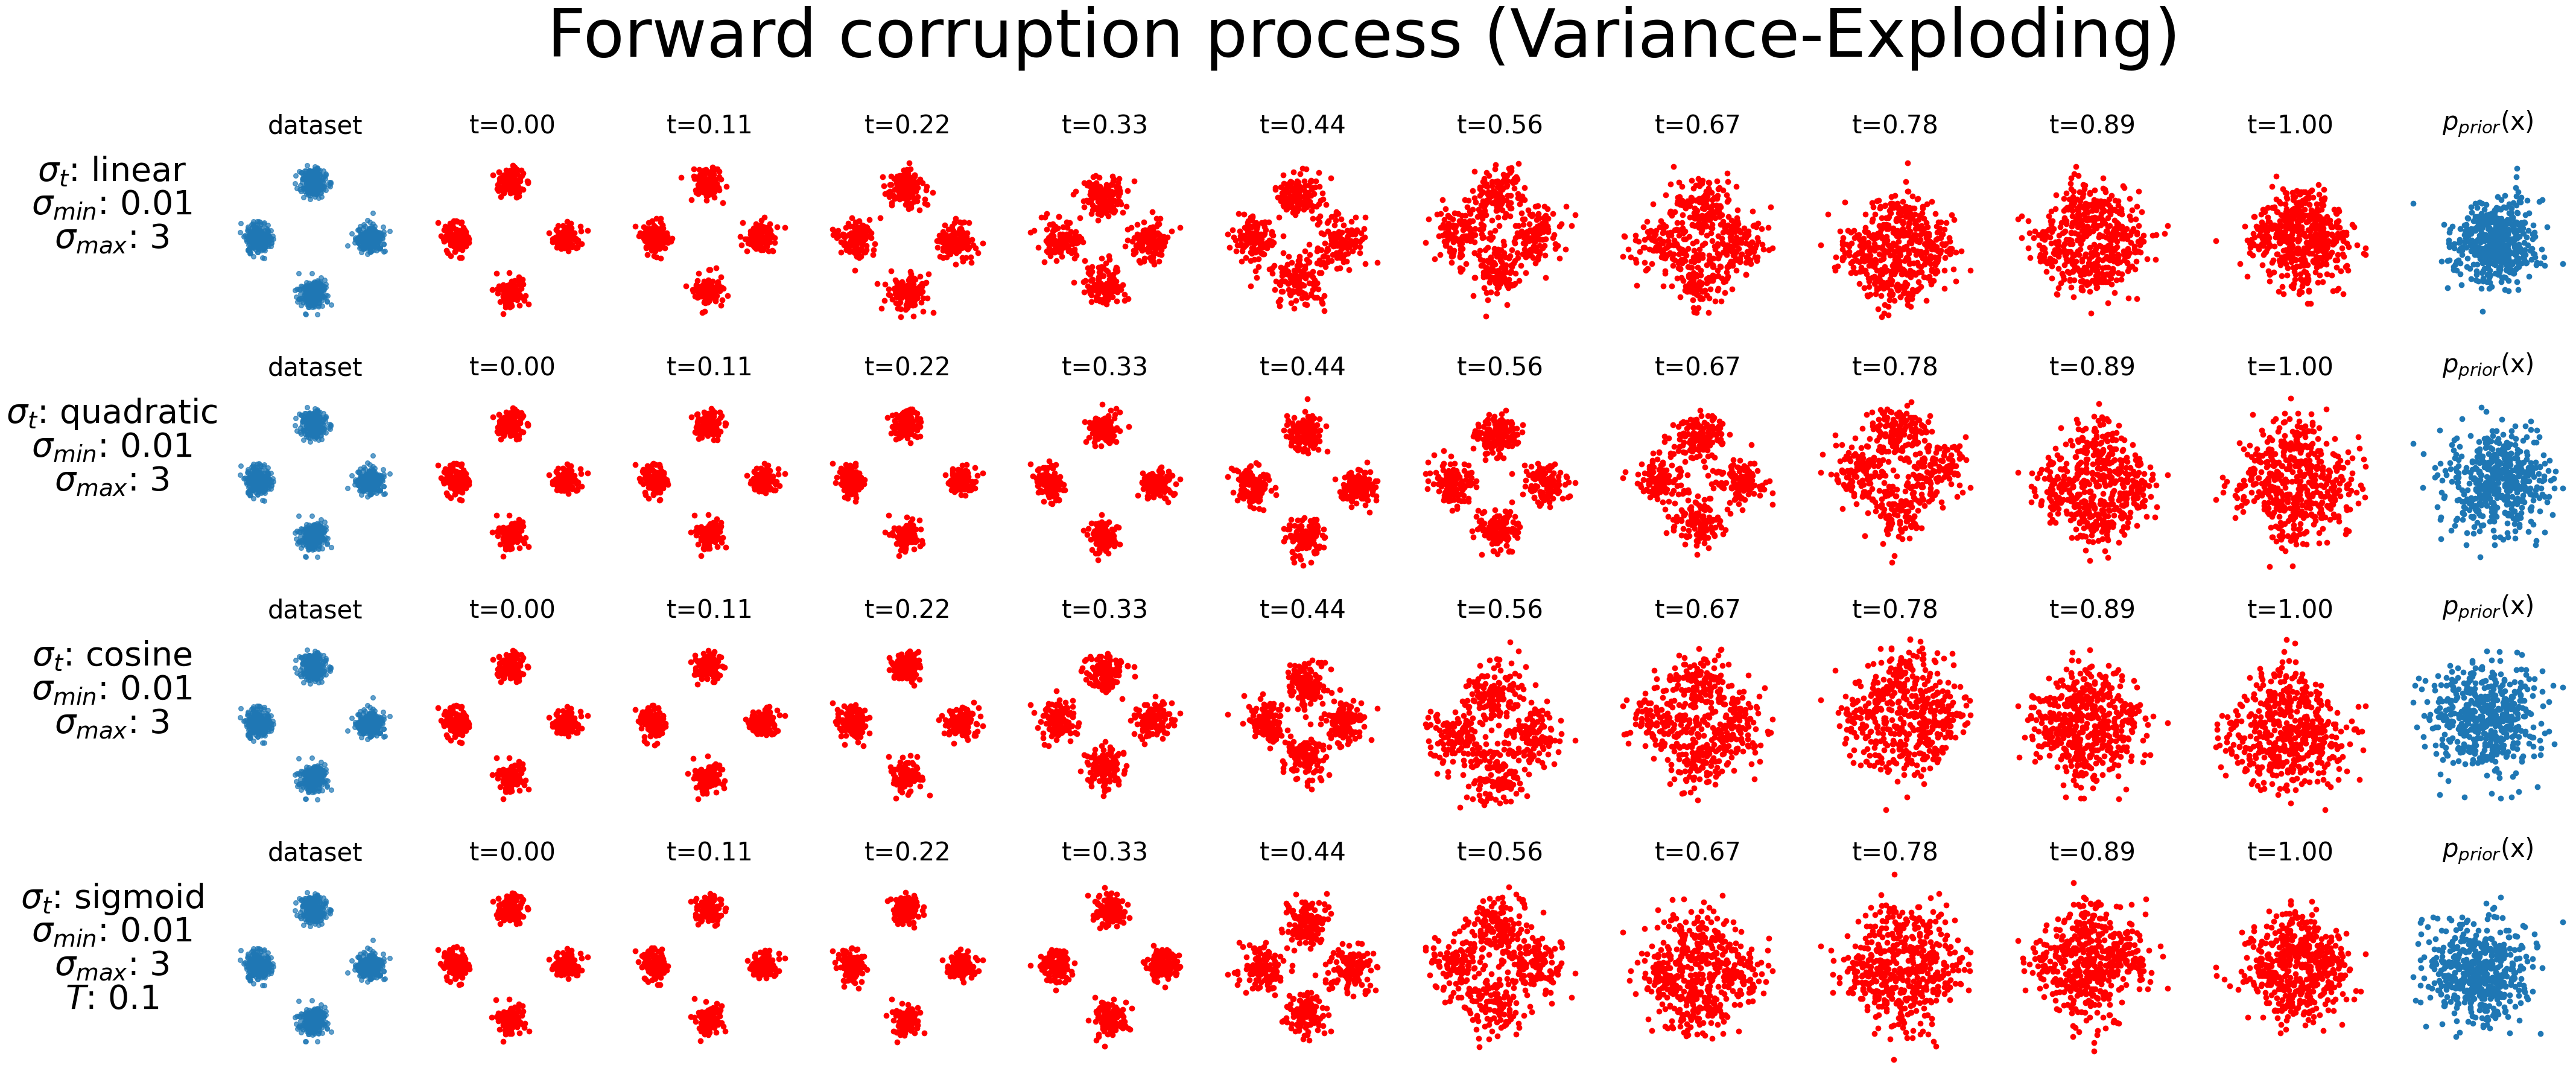

<Figure size 640x480 with 0 Axes>

In [13]:
# Visualize the blobs
x0 = ds.X[:500].to(device)

n_time = 10 
fig, axs = plt.subplots(len(models), n_time + 2, figsize=(5*n_time, len(models)*5))

for nm, model in enumerate(models):
    ds.add_blobs(axs[nm, 0])
    axs[nm,  0].axis('off')
    axs[nm, 0].set_xlim(-10, 10)
    axs[nm,  0].set_ylim(-10, 10)
    axs[nm,  0].set_title(f'dataset', fontsize=30)
    axs[nm,  0].axis('equal')
    axs[nm,  0].text(-18.0, 6, f"$\sigma_t$: {model.mode["schedule"]}", ha='center', va='center', fontsize=40)
    axs[nm,  0].text(-18.0, 3, f"$\sigma_{{min}}$: {model.mode["sigma_min"]}", ha='center', va='center', fontsize=40)
    axs[nm,  0].text(-18.0, 0, f"$\sigma_{{max}}$: {model.mode["sigma_max"]}", ha='center', va='center', fontsize=40)
    if model.mode["schedule"] == 'sigmoid':
        axs[nm,  0].text(-18.0, -3, f"$T$: {model.mode["T"]}", ha='center', va='center', fontsize=40)
        
    for i, t in enumerate(torch.linspace(0, 1, n_time)):
        x = model.corruption_process(x0, t).detach().cpu()
        axs[nm, i+1].scatter(x[:, 0], x[:, 1], color='red', label='*')
        axs[nm, i+1].set_xlim(-10, 10)
        axs[nm, i+1].set_ylim(-10, 10)
        axs[nm, i+1].axis('equal')
        axs[nm, i+1].axis('off')
        axs[nm, i+1].set_title(f't={t:.2f}', fontsize=30)
    axs[nm, -1].set_title(f'$p_{{prior}}$(x)', fontsize=30)
    axs[nm, -1].set_xlim(-10, 10)
    axs[nm, -1].set_ylim(-10, 10)
    axs[nm, -1].axis('equal')
    axs[nm, -1].axis('off')
    randn_samples = torch.randn(500, 2)
    axs[nm, -1].scatter(
        randn_samples[:, 0], 
        randn_samples[:, 1], color='tab:blue', label='*')
plt.suptitle(f'Forward corruption process (Variance-Exploding)', fontsize=80, y=0.99)
plt.show()
plt.tight_layout()

In [14]:
score = None
models = [
    ScoreBasedModelsV2(score,
        mode={'type': 'vp',
            'b_max': 3,
            'schedule': 'linear'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 'vp',
            'b_max': 3,
            'schedule': 'quadratic'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 'vp',
            'b_max': 3,
            'schedule': 'cosine'}).to(device),
    ScoreBasedModelsV2(score,
        mode={'type': 'vp',
            'b_max': 3,
            'T': 0.1,
            'schedule': 'sigmoid'}).to(device),
]

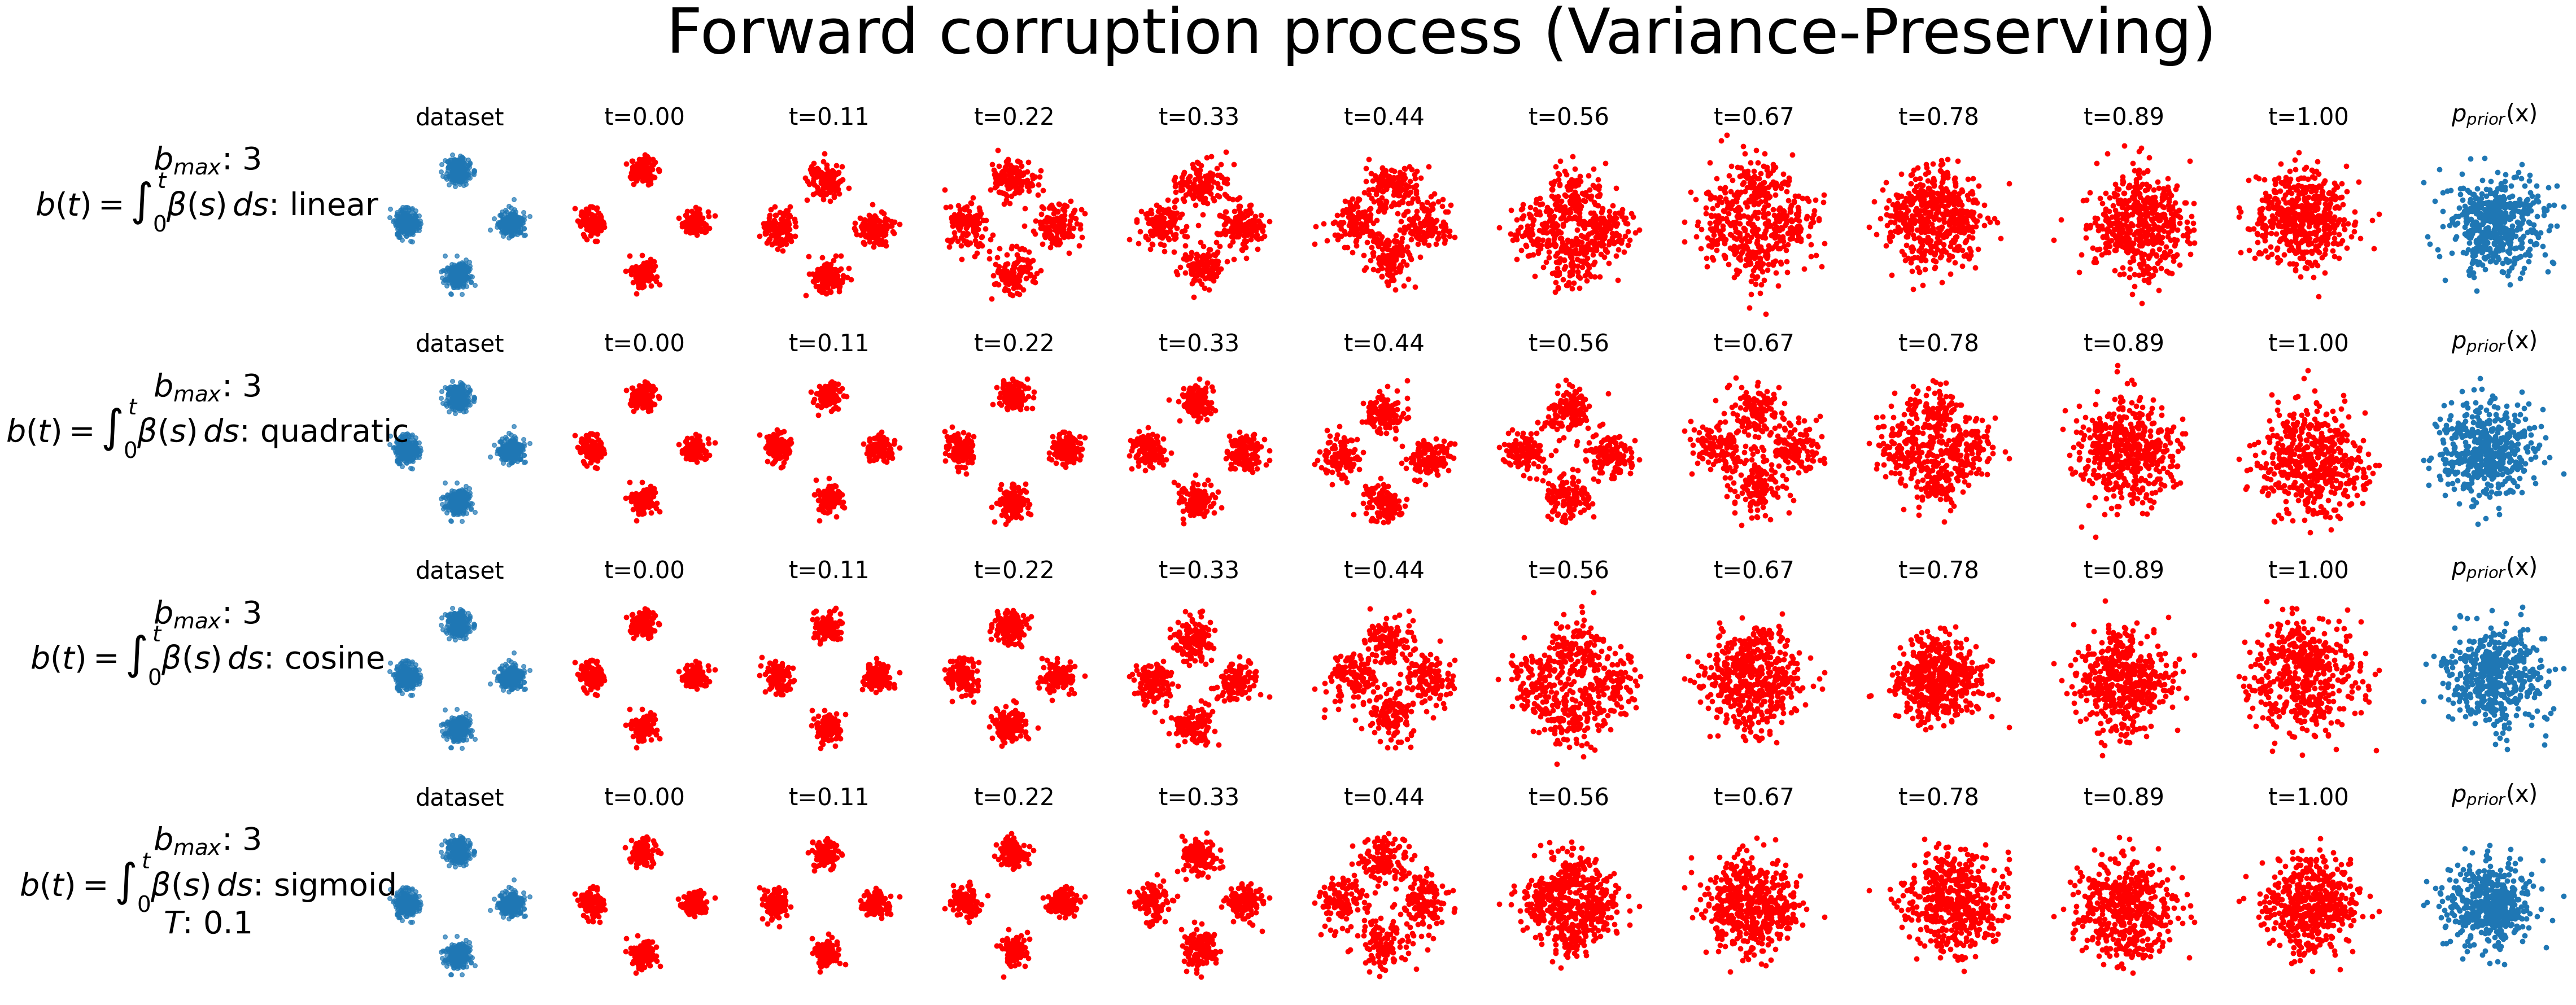

<Figure size 640x480 with 0 Axes>

In [16]:
# Visualize the blobs
x0 = ds.X[:500].to(device)

n_time = 10 
fig, axs = plt.subplots(len(models), n_time + 2, figsize=(5*n_time, len(models)*5))

for nm, model in enumerate(models):
    ds.add_blobs(axs[nm, 0])
    axs[nm,  0].axis('off')
    axs[nm, 0].set_xlim(-10, 10)
    axs[nm,  0].set_ylim(-10, 10)
    axs[nm,  0].set_title(f'dataset', fontsize=30)
    axs[nm,  0].axis('equal')
    axs[nm,  0].text(-24.0, 2, r"$b(t)=\int_{0}^{t} \beta(s) \, ds$: " + f"{model.mode["schedule"]}", ha='center', va='center', fontsize=40)
    axs[nm,  0].text(-24.0, 6, f"$b_{{max}}$: {model.mode["b_max"]}", ha='center', va='center', fontsize=40)
    if model.mode["schedule"] == 'sigmoid':
        axs[nm,  0].text(-24.0, -2, f"$T$: {model.mode["T"]}", ha='center', va='center', fontsize=40)
        
    for i, t in enumerate(torch.linspace(0, 1, n_time)):
        x = model.corruption_process(x0, t).detach().cpu()
        axs[nm, i+1].scatter(x[:, 0], x[:, 1], color='red', label='*')
        axs[nm, i+1].set_xlim(-10, 10)
        axs[nm, i+1].set_ylim(-10, 10)
        axs[nm, i+1].axis('equal')
        axs[nm, i+1].axis('off')
        axs[nm, i+1].set_title(f't={t:.2f}', fontsize=30)
    axs[nm, -1].set_title(f'$p_{{prior}}$(x)', fontsize=30)
    axs[nm, -1].set_xlim(-10, 10)
    axs[nm, -1].set_ylim(-10, 10)
    axs[nm, -1].axis('equal')
    axs[nm, -1].axis('off')
    randn_samples = torch.randn(500, 2)
    axs[nm, -1].scatter(
        randn_samples[:, 0], 
        randn_samples[:, 1], color='tab:blue', label='*')
plt.suptitle(f'Forward corruption process (Variance-Preserving)', fontsize=80, y=0.99)
plt.show()
plt.tight_layout()